In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from bootstrap_alpha import bootstrap, get_example_data, demo
import numpy as np

from krippendorff import alpha


In [2]:
from collections import Counter
def is_permutation_of_an_element_in_list(x, X): 
    for list1 in x:
        for a in [a.flatten() for a in np.vsplit(X, X.shape[0])]:
            if (not np.array_equal(a.sort(), list1.sort())):
                return False
            else:
                try:
                    
                    print([list(a).index(i) for i in list1])
                    print(list(a), list(list1))
                except:
                    continue
    print("-------------------")
    return True

In [3]:
from scipy.stats import pearsonr
n = 100
x = np.linspace(0, 10, n)
y = x + np.random.uniform(size=n)
print(pearsonr(x, y)[0])  # element 0 is the statistic

0.995650352948157


In [4]:
from scipy.stats import bootstrap
import numpy as np

In [5]:
from scipy.stats import norm
dist = norm(loc=2, scale=4)  # our "unknown" distribution
data = dist.rvs(size=100, random_state=42)
data
(data,)

(array([ 3.98685661e+00,  1.44694280e+00,  4.59075415e+00,  8.09211943e+00,
         1.06338650e+00,  1.06345217e+00,  8.31685126e+00,  5.06973892e+00,
         1.22102456e-01,  4.17024017e+00,  1.46329229e-01,  1.37080986e-01,
         2.96784909e+00, -5.65312098e+00, -4.89967133e+00, -2.49150117e-01,
        -2.05132448e+00,  3.25698933e+00, -1.63209630e+00, -3.64921481e+00,
         7.86259508e+00,  1.09689480e+00,  2.27011282e+00, -3.69899274e+00,
        -1.77530898e-01,  2.44369036e+00, -2.60397431e+00,  3.50279207e+00,
        -4.02554760e-01,  8.33225001e-01, -4.06826449e-01,  9.40911274e+00,
         1.94601110e+00, -2.23084372e+00,  5.29017965e+00, -2.88337460e+00,
         2.83545438e+00, -5.83868050e+00, -3.31274420e+00,  2.78744494e+00,
         4.95386632e+00,  2.68547312e+00,  1.53740687e+00,  7.95585218e-01,
        -3.91408796e+00, -8.79376834e-01,  1.57444916e-01,  6.22848890e+00,
         3.37447316e+00, -5.05216062e+00,  3.29633588e+00,  4.59670878e-01,
        -7.0

In [6]:
X = get_example_data()

X = np.random.randn(*X.shape)

X

array([[-1.07225605e+00,  4.55542231e-01, -1.56277547e+00,
        -1.15453161e+00,  1.78236384e+00],
       [ 7.65007494e-01, -2.38655362e+00,  1.22024123e-02,
         1.01864061e+00, -2.42528727e-01],
       [-2.41580679e-03,  2.20280976e-01,  1.32030038e+00,
        -3.12805011e-01, -9.72603095e-01],
       [-4.37879544e-01,  1.33536220e+00,  7.45838991e-01,
        -6.00102690e-01,  4.73281992e-01],
       [-9.32031698e-02,  6.79720740e-01, -1.72455277e+00,
         5.08067418e-02, -2.32696699e-02],
       [-9.83806826e-01, -7.59111700e-01,  1.15594352e+00,
         3.23630479e-01,  9.57138656e-01],
       [ 6.86478081e-01, -1.08179842e+00,  1.34951377e+00,
        -6.95184720e-01, -1.04879668e+00],
       [ 3.36609276e-01,  1.21891154e+00, -4.44117122e-01,
         5.22853655e-01, -3.71007451e-01],
       [-3.33473461e-01,  1.13581827e+00,  1.18449481e+00,
         1.50767149e-01, -9.12314852e-01],
       [-7.04628205e-01, -1.55021880e-01,  1.03332528e+00,
        -2.22372540e-02

In [7]:
from scipy.stats import bootstrap

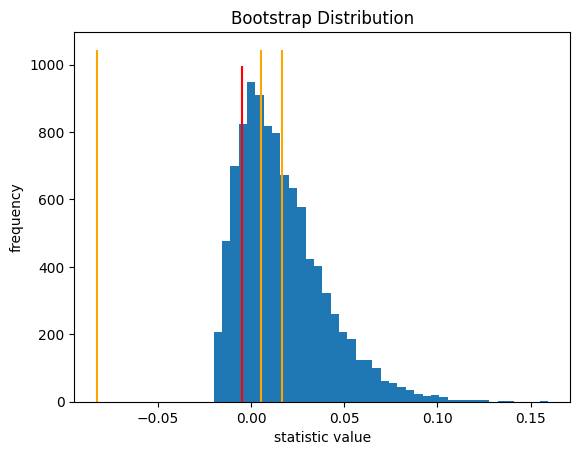

In [8]:
indices = np.arange(X.shape[0])
res = bootstrap(
    (indices,),
      lambda i: alpha(X[i,:],level_of_measurement="interval"),
        random_state=42,
        vectorized=False,
        confidence_level=0.95,
        method="BCa"
    )
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=40)
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
ax.vlines(x=alpha(X, level_of_measurement="interval"), ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='red')
ax.vlines(x=[res.confidence_interval[0], res.confidence_interval[1], np.mean(res.bootstrap_distribution)], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='orange')
plt.show()

In [9]:
res

BootstrapResult(confidence_interval=ConfidenceInterval(low=-0.08261893905716511, high=0.005469014410785275), bootstrap_distribution=array([0.03563285, 0.0146574 , 0.0470995 , ..., 0.00823202, 0.02593273,
       0.01771333]), standard_error=0.023138587758455193)

In [10]:
np.mean(res.bootstrap_distribution)

0.016476154442780822

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from krippendorff import alpha
from bootstrap_alpha import bootstrap, get_example_data

In [12]:
alpha_value = alpha(reliability_data=X, level_of_measurement='interval')

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

for i, sampling_method in enumerate(['krippendorff', 'random']):

    ci, est = bootstrap(
        reliability_data=X,
        level_of_measurement='interval',
        num_iterations=10000,
        return_bootstrap_estimates=True,
        sampling_method=sampling_method,
    )

    mu = np.mean(est)
    ax[i].hist(est, bins=40)
    ylim = ax[i].get_ylim()

    ax[i].vlines(x=alpha_value, ymin=ylim[0], ymax=ylim[1], color='red')
    ax[i].vlines(x=[ci[0], ci[1], mu], ymin=ylim[0], ymax=ylim[1], color='orange')
    ax[i].set_xlabel('Alpha')
    ax[i].set_ylabel('Frequency')
    ax[i].set_title(f"Sampling_method: {sampling_method}")

In [ ]:
mu

0.7658385272252848